# Support Vector Machines Homework

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from sklearn.model_selection import cross_val_score 


# Create a standard scaler for scaling data
standard_scaler = StandardScaler()

# Load the breasr cancer dataset
cancer = load_breast_cancer()

# Create a dataframe from the breast cancer data
df = pd.DataFrame(cancer.data)
df.columns = cancer.feature_names
df['outcome'] = cancer.target

# Get the features and targets from the dataframe
X = cancer.data
y = cancer.target

# Scale X and split data into train and test data
scaled_X = standard_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.25, random_state=0)

# Function for printing confusion matrix accuracy metrics
def confusion_matrix_stats(matrix):
    true_neg, false_pos, false_neg, true_pos = matrix[0, 0], matrix[0, 1], matrix[1, 0], matrix[1, 1]
    
    accuracy = ((true_pos + true_neg) / float(true_pos + true_neg + false_pos + false_neg))
    print('Accuracy:', accuracy )
    percision = true_pos / float(true_pos + false_pos)
    print('Percision:', percision)
    recall = true_pos / float(false_neg + true_pos)
    print('Recall:', recall)
    f1_score = 2 * percision * recall / float(percision + recall)
    print('F1 Score', f1_score)

## Without Checking for Multicollinearity

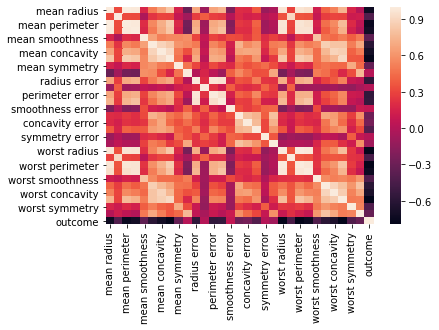

In [2]:
# Corrilation Heatmap without checking for mutlicollinearity
sn.heatmap(df.corr())
plt.show()

In [3]:
from sklearn.svm import SVC

log_svm = SVC(kernel='sigmoid', gamma='auto')
log_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [4]:
y_pred = log_svm.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
confusion_matrix_stats(confusion)

print('')
all_accuracies = cross_val_score(estimator=log_svm, X=X_train, y=y_train, cv=5, scoring='accuracy')
print('Accuracies:', all_accuracies)
print('Accuracies Mean:', all_accuracies.mean())

all_f1 = cross_val_score(estimator=log_svm, X=X_train, y=y_train, cv=5, scoring='f1')
print('F1-Scores:', all_f1)
print('F1-Mean:', all_f1.mean())

Accuracy: 0.951048951048951
Percision: 0.946236559139785
Recall: 0.9777777777777777
F1 Score 0.9617486338797814

Accuracies: [0.94186047 0.93023256 0.92941176 0.97647059 0.95238095]
Accuracies Mean: 0.9460712657155886
F1-Scores: [0.95327103 0.94736842 0.94545455 0.98113208 0.96296296]
F1-Mean: 0.9580378065958441


## With Checking for Multicollinearity

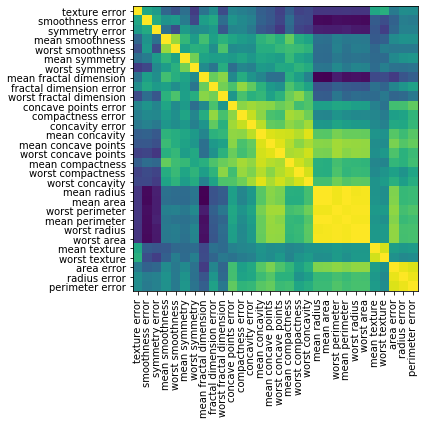

In [5]:
# Corrilation heatmap with checking for mutlicollinearity
fig, (ax1) = plt.subplots(1, figsize=(10, 6))
corr = spearmanr(scaled_X).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(corr_linkage, labels=cancer.feature_names, ax=ax1, leaf_rotation=90, no_plot=True)
dendro_idx = np.arange(0, len(dendro['ivl']))

ax1.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax1.set_xticks(dendro_idx)
ax1.set_yticks(dendro_idx)
ax1.set_xticklabels(dendro['ivl'], rotation='vertical')
ax1.set_yticklabels(dendro['ivl'])
fig.tight_layout()
plt.show()

In [6]:
from sklearn.svm import SVC
from collections import defaultdict

cluster_ids = hierarchy.fcluster(corr_linkage, 1, criterion='distance')
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

X_train_sel = X_train[:, selected_features]
X_test_sel = X_test[:, selected_features]

log_svm = SVC(kernel='sigmoid', gamma='auto')
log_svm.fit(X_train_sel, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
y_pred = log_svm.predict(X_test_sel)

confusion = confusion_matrix(y_test, y_pred)
confusion_matrix_stats(confusion)

print('')
all_accuracies = cross_val_score(estimator=log_svm, X=X_train_sel, y=y_train, cv=5, scoring='accuracy')
print('Accuracies:', all_accuracies)
print('Accuracies Mean:', all_accuracies.mean())

all_f1 = cross_val_score(estimator=log_svm, X=X_train_sel, y=y_train, cv=5, scoring='f1')
print('F1-Scores:', all_f1)
print('F1-Mean:', all_f1.mean())

Accuracy: 0.916083916083916
Percision: 0.9239130434782609
Recall: 0.9444444444444444
F1 Score 0.934065934065934

Accuracies: [0.91860465 0.87209302 0.89411765 0.95294118 0.92857143]
Accuracies Mean: 0.9132655853038891
F1-Scores: [0.9380531  0.9009009  0.91428571 0.96226415 0.94444444]
F1-Mean: 0.9319896615839177
